In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df_bank = pd.read_csv('data/Churn.csv')
df_bank.sample(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8257,8258,15738018,Johnston,571,France,Male,40,5,0.00,2,0,0,72849.29,0
5338,5339,15784000,Pope,715,Germany,Female,34,9,102277.52,1,0,0,177852.57,1


In [3]:
df_bank.shape

(10000, 14)

# Data Analysis

In [4]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
print('''These columns are insignificant for model so droping them 'RowNumber', 'CustomerId', 'Surname' ''')

These columns are insignificant for model so droping them 'RowNumber', 'CustomerId', 'Surname' 


In [8]:
df_bank.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [9]:
df_bank.sample(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6056,768,France,Male,25,6,0.0,2,1,1,21215.67,0
9958,537,France,Male,37,6,0.0,1,1,1,17802.42,0


In [10]:
df_bank_num = df_bank.select_dtypes(include=np.number)
df_bank_cat = df_bank.select_dtypes(exclude=np.number)

### Numberic Data Analysis

In [11]:
df_bank_num.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
num_analysis_col =['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary']
df_bank_num[num_analysis_col].sample(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
5455,805,45,9,116585.97,1,189428.75
2620,603,35,6,128993.76,2,130483.56


In [14]:
df_bank_num[num_analysis_col].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [20]:
df_bank[num_analysis_col].isnull().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
EstimatedSalary    0
dtype: int64

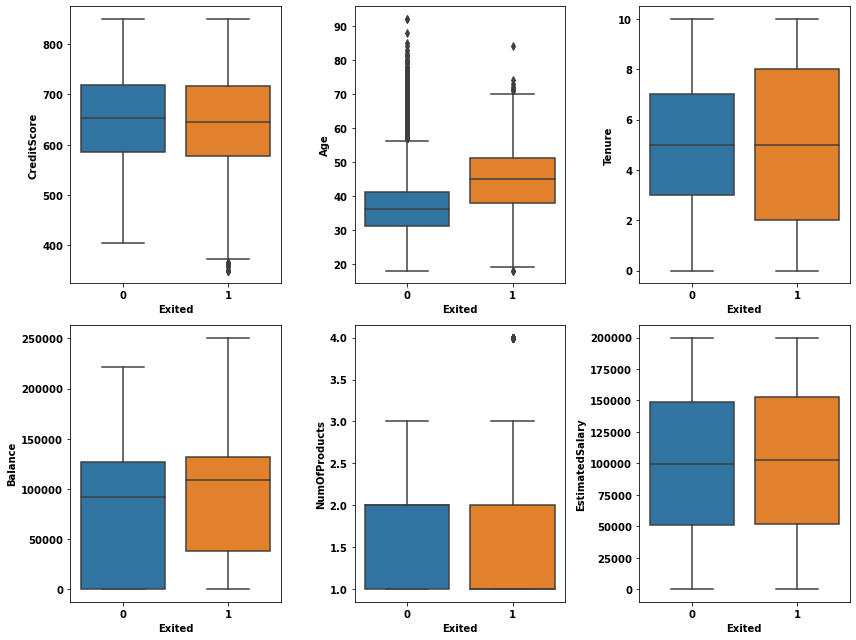

In [19]:
plt.rcParams['figure.figsize'] = (12, 9)
plt_num = 1
for col in df_bank[num_analysis_col]:
    plt.subplot(2, 3, plt_num)
    sns.boxplot(data=df_bank, y=df_bank[col], x=df_bank['Exited'])
    plt_num += 1

plt.tight_layout()
plt.show()

### Outlier Treatment

In [21]:
from scipy import stats

In [24]:
df_bank.shape

(10000, 11)

In [22]:
z = np.abs(stats.zscore(df_bank[num_analysis_col]))
print(z)

[[0.32622142 0.29351742 1.04175968 1.22584767 0.91158349 0.02188649]
 [0.44003595 0.19816383 1.38753759 0.11735002 0.91158349 0.21653375]
 [1.53679418 0.29351742 1.03290776 1.33305335 2.52705662 0.2406869 ]
 ...
 [0.60498839 0.27860412 0.68712986 1.22584767 0.91158349 1.00864308]
 [1.25683526 0.29351742 0.69598177 0.02260751 0.80773656 0.12523071]
 [1.46377078 1.04143285 0.35020386 0.85996499 0.91158349 1.07636976]]


In [25]:
df_bank = df_bank[(z<3).all(axis=1)]
df_bank

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Categorical Data Analysis

In [26]:
df_bank_cat.columns

Index(['Geography', 'Gender'], dtype='object')

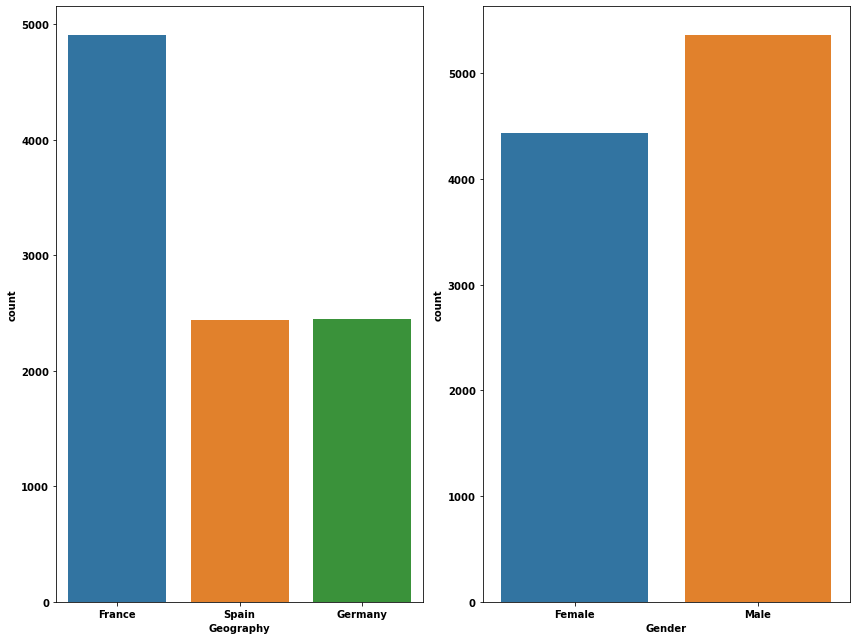

In [29]:
plt_num=1
for col in df_bank_cat.columns:
    plt.subplot(1, 2, plt_num)
    sns.countplot(data=df_bank, x=col)
    plt_num += 1
    
    
plt.tight_layout()
plt.show()

### Encoding Categorical Data

In [31]:
df_bank= pd.get_dummies(data=df_bank, columns=['Geography', 'Gender'])
df_bank.sample(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
2940,711,28,5,0.0,2,1,1,93959.96,0,0,0,1,1,0
9366,736,36,6,0.0,1,1,0,70496.66,0,1,0,0,1,0


### Check Balance of Target Data

<AxesSubplot:xlabel='Exited', ylabel='count'>

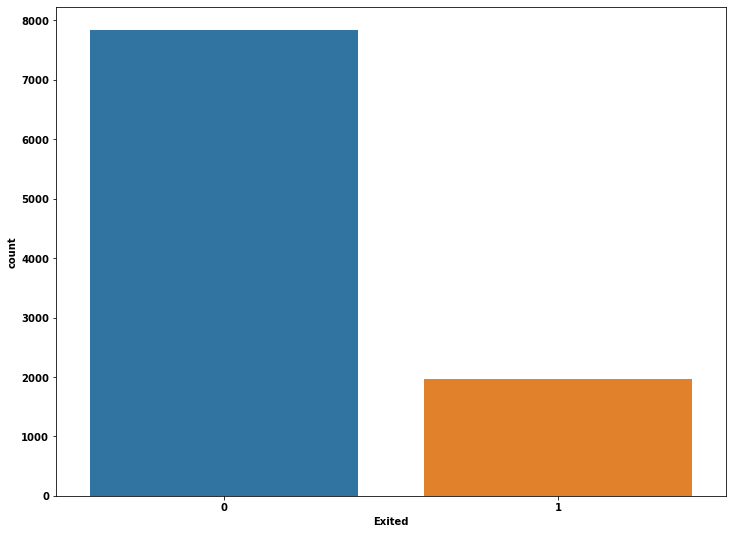

In [32]:
sns.countplot(data=df_bank, x='Exited')

### Check - Colleration of Data

In [33]:
df_bank_corr = df_bank[num_analysis_col].corr()
df_bank_corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.000000,-0.009138,0.000121,0.007141,0.011182,0.001757
Age,-0.009138,1.000000,-0.012346,0.037338,-0.054387,-0.009026
Tenure,0.000121,-0.012346,1.000000,-0.012678,0.012609,0.007962
Balance,0.007141,0.037338,-0.012678,1.000000,-0.331017,0.013352
NumOfProducts,0.011182,-0.054387,0.012609,-0.331017,1.000000,0.012667
EstimatedSalary,0.001757,-0.009026,0.007962,0.013352,0.012667,1.000000


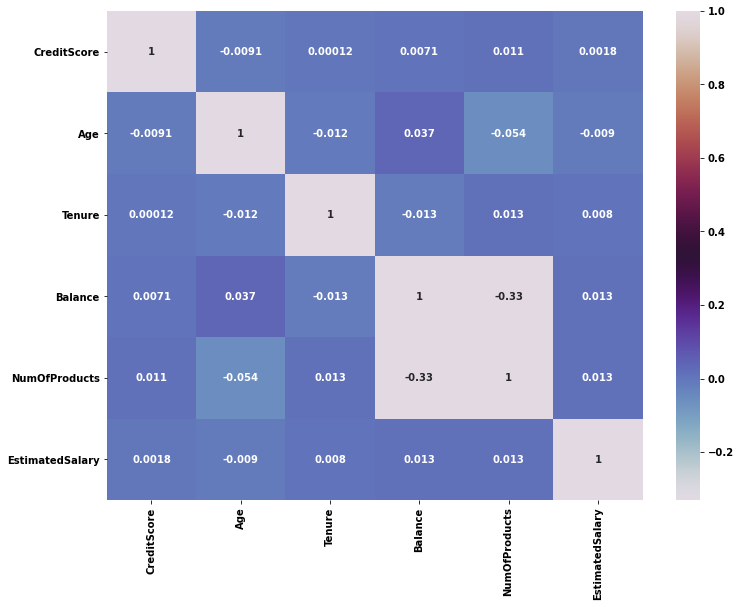

In [38]:
sns.heatmap(df_bank_corr, annot=True, cmap='twilight')
plt.show()

Text(0.5, 1.0, 'Correlation of Numeric Values with Exited (target variable)')

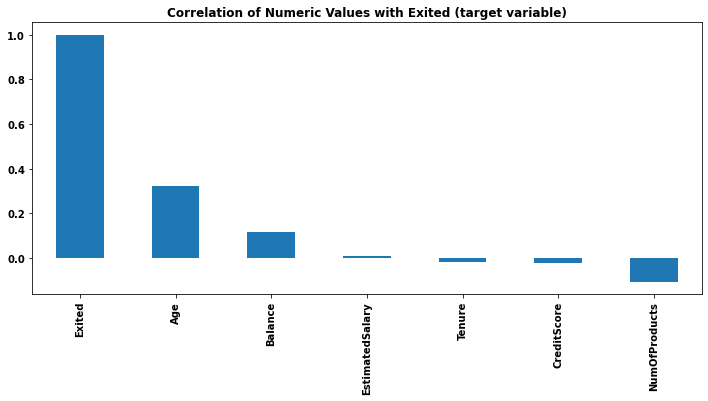

In [42]:
df_bank[num_analysis_col+['Exited']].corr()['Exited'].sort_values(ascending=False).plot(kind='bar', figsize=(12, 5))
plt.title('Correlation of Numeric Values with Exited (target variable)')

In [43]:
print('''
Observation: Numeric columns are independent of each other
No significant correlation observed''')


Observation: Numeric columns are independent of each other
No significant correlation observed


# Model Bulding

### Train test split

In [45]:
X = df_bank.drop(columns=['Exited'], axis=1)
y = df_bank['Exited']
X.sample(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
3792,444,36,7,0.0,2,0,1,138743.86,1,0,0,0,1
5513,708,33,8,0.0,2,0,1,15246.83,1,0,0,1,0


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    stratify=y)

### Base Model

In [47]:
mod_lr = LogisticRegression()
mod_lr.fit(X_train, y_train)

LogisticRegression()

In [48]:
df_bank_feature_imp = pd.DataFrame(
    {
    'Feature': X_train.columns,
    'Logit': mod_lr.coef_[0],
    'Odd_Ratio': np.exp(mod_lr.coef_[0])
    }
)
df_bank_feature_imp

,Feature,Logit,Odd_Ratio
0,CreditScore,-0.005498,0.994517
1,Age,0.051628,1.052984
2,Tenure,-0.002158,0.997845
3,Balance,0.000003,1.000003
4,NumOfProducts,-0.001175,0.998825
5,HasCrCard,-0.000210,0.999790
6,IsActiveMember,-0.001667,0.998334
7,EstimatedSalary,-0.000001,0.999999
8,Geography_France,-0.001013,0.998988
9,Geography_Germany,0.001172,1.001172


<AxesSubplot:>

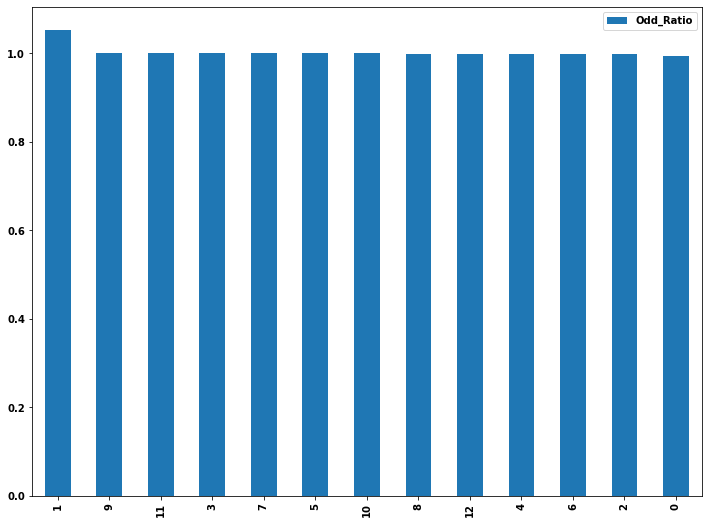

In [50]:
df_bank_feature_imp[['Odd_Ratio']].sort_values(by='Odd_Ratio',
                                                 ascending=False, axis=0).plot(kind='bar')

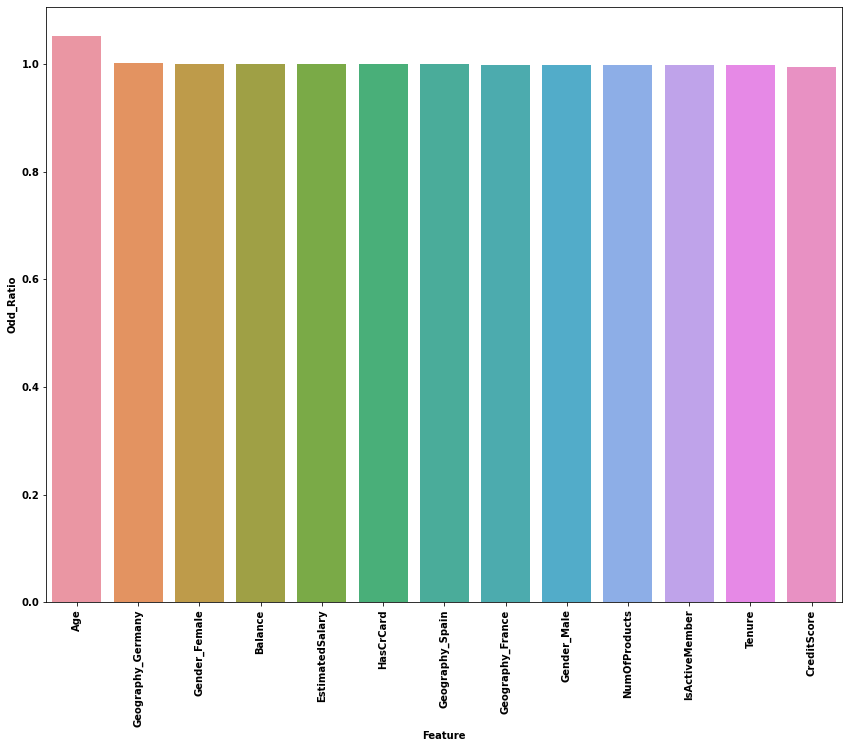

In [51]:
sns.barplot(data=df_bank_feature_imp.sort_values(by='Odd_Ratio',
                                                ascending=False), 
           x='Feature', y='Odd_Ratio')

plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [52]:
print('''
Observation: 
1. One unit increase in Age, will increase the Odds of getting exited by 1.05 times
2. One unit increase of CreditScore, will descrease the Odd of getting exited by 0.994 times''')


Observation: 
1. One unit increase in Age, will increase the Odds of getting exited by 1.05 times
2. One unit increase of CreditScore, will descrease the Odd of getting exited by 0.994 times


In [53]:
from sklearn.metrics import ConfusionMatrixDisplay

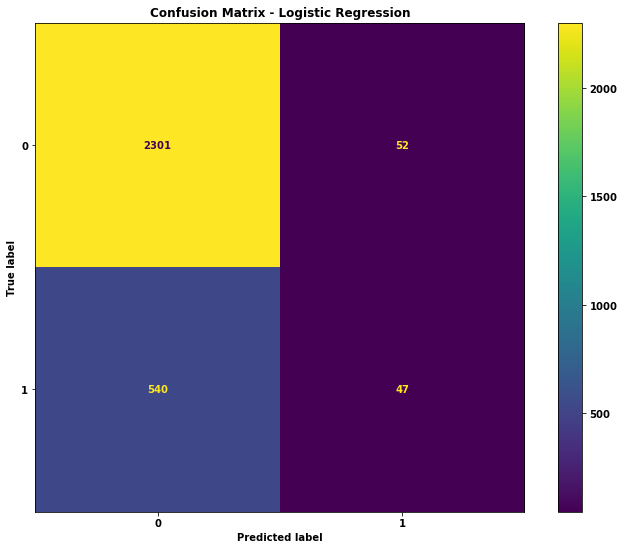


Classification Report
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      2353
           1       0.47      0.08      0.14       587

    accuracy                           0.80      2940
   macro avg       0.64      0.53      0.51      2940
weighted avg       0.74      0.80      0.74      2940



In [57]:
y_pred = mod_lr.predict(X_test)

ConfusionMatrixDisplay(confusion_matrix=
                      confusion_matrix(y_true=y_test, y_pred=y_pred), 
                      display_labels=mod_lr.classes_).plot()
plt.title('Confusion Matrix - Logistic Regression')
plt.show()
print('\nClassification Report')
print(classification_report(y_true=y_test, y_pred=y_pred))

#### Turning the model by updating the Threshold

In [69]:
plt.rcParams['figure.figsize']= (5,5)
def show_metrics(y_test, y_pred):
    ConfusionMatrixDisplay(confusion_matrix=
                      confusion_matrix(y_true=y_test, y_pred=y_pred), 
                      display_labels=mod_lr.classes_).plot()
    plt.title('Confusion Matrix - Logistic Regression')
    plt.show()
    print('\nClassification Report')
    print(classification_report(y_true=y_test, y_pred=y_pred))

In [58]:
mod_lr.predict_proba(X_test)

array([[0.52771972, 0.47228028],
       [0.67763483, 0.32236517],
       [0.85263254, 0.14736746],
       ...,
       [0.78740709, 0.21259291],
       [0.79018212, 0.20981788],
       [0.92158141, 0.07841859]])

In [59]:
mod_lr.predict_proba(X_test)[:, 1]

array([0.47228028, 0.32236517, 0.14736746, ..., 0.21259291, 0.20981788,
       0.07841859])

In [60]:
proba_for_1_class = mod_lr.predict_proba(X_test)[:, 1]

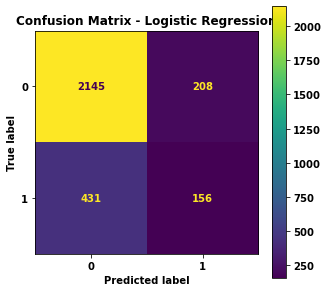


Classification Report
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      2353
           1       0.43      0.27      0.33       587

    accuracy                           0.78      2940
   macro avg       0.63      0.59      0.60      2940
weighted avg       0.75      0.78      0.76      2940



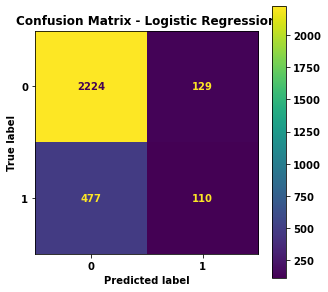


Classification Report
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      2353
           1       0.46      0.19      0.27       587

    accuracy                           0.79      2940
   macro avg       0.64      0.57      0.57      2940
weighted avg       0.75      0.79      0.76      2940



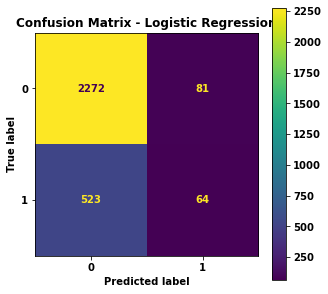


Classification Report
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      2353
           1       0.44      0.11      0.17       587

    accuracy                           0.79      2940
   macro avg       0.63      0.54      0.53      2940
weighted avg       0.74      0.79      0.74      2940



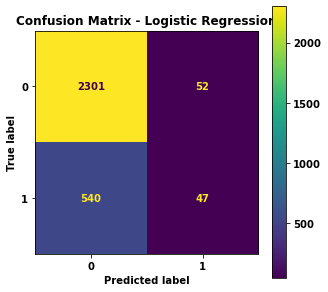


Classification Report
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      2353
           1       0.47      0.08      0.14       587

    accuracy                           0.80      2940
   macro avg       0.64      0.53      0.51      2940
weighted avg       0.74      0.80      0.74      2940



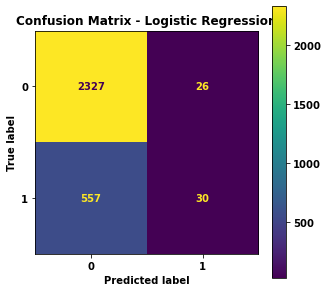


Classification Report
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      2353
           1       0.54      0.05      0.09       587

    accuracy                           0.80      2940
   macro avg       0.67      0.52      0.49      2940
weighted avg       0.75      0.80      0.73      2940



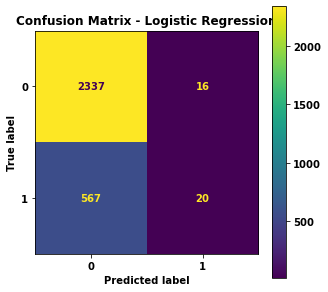


Classification Report
              precision    recall  f1-score   support

           0       0.80      0.99      0.89      2353
           1       0.56      0.03      0.06       587

    accuracy                           0.80      2940
   macro avg       0.68      0.51      0.48      2940
weighted avg       0.75      0.80      0.72      2940



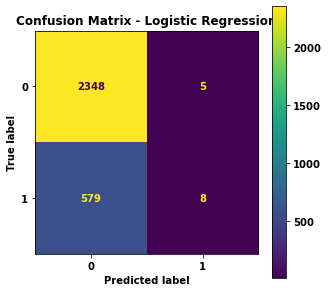


Classification Report
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2353
           1       0.62      0.01      0.03       587

    accuracy                           0.80      2940
   macro avg       0.71      0.51      0.46      2940
weighted avg       0.76      0.80      0.72      2940



In [70]:
# Changing the threshold value and Checking if the accuracy/metrics changes

for threshold in [0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65]:
    y_pred_dummy = np.zeros([len(y_test), 1])
    y_pred_dummy[proba_for_1_class>=threshold]=1
    show_metrics(y_test, y_pred_dummy)

### Improving the Model Performance

In [71]:
from xgboost import XGBClassifier

In [72]:
mod_lr = LogisticRegression()
mod_dtc = DecisionTreeClassifier()
mod_rfc = RandomForestClassifier()
mod_knn = KNeighborsClassifier()
mod_gnb = GaussianNB()
mod_xgb = XGBClassifier()

In [73]:
kf = KFold(n_splits=5, shuffle=True)

In [74]:
import warnings
warnings.filterwarnings('ignore')

In [76]:
df_mod_scores = pd.DataFrame()
for est, mod_name in zip([mod_lr, mod_dtc, mod_rfc, mod_knn, mod_gnb, mod_xgb], 
                         ['lr', 'dtc', 'rfc', 'knn', 'gnb', 'xgb']):
    score = cross_val_score(estimator=est, X=X, y=y, cv=kf, scoring='f1_weighted')
    print(f'Model Name: {mod_name}, \
          Mean:{np.mean(score)}, Variance:{np.std(score)/np.mean(score)}')
    df_mod_scores = df_mod_scores.append({
        'Model Name': mod_name,
        'Mean':np.mean(score), 
        'Variance':np.std(score)/np.mean(score)
    }, ignore_index=True)
    
df_mod_scores

Model Name: lr,           Mean:0.7362770624608608, Variance:0.012698783329892454
Model Name: dtc,           Mean:0.7890613322783704, Variance:0.007924524413734148
Model Name: rfc,           Mean:0.8455086282724334, Variance:0.008198957844585032
Model Name: knn,           Mean:0.7159392048655776, Variance:0.022388650529156714
Model Name: gnb,           Mean:0.7516042330354449, Variance:0.0139928930460573
[07:08:44] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:08:44] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:08:45] WARN

,Mean,Model Name,Variance
0,0.736277,lr,0.012699
1,0.789061,dtc,0.007925
2,0.845509,rfc,0.008199
3,0.715939,knn,0.022389
4,0.751604,gnb,0.013993
5,0.838960,xgb,0.010062


In [77]:
df_mod_scores[['Model Name','Mean','Variance']].sort_values(by=['Mean'], ascending=False)

,Model Name,Mean,Variance
2,rfc,0.845509,0.008199
5,xgb,0.838960,0.010062
1,dtc,0.789061,0.007925
4,gnb,0.751604,0.013993
0,lr,0.736277,0.012699
3,knn,0.715939,0.022389


In [78]:
print('''
Observation: Random forest performed well both in terms of Mean and Variance''')


Observation: Random forest performed well both in terms of Mean and Variance


### Handling Imbalance data (SMOTE and NearMiss)

In [79]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline

In [80]:
y.value_counts()

0    7841
1    1958
Name: Exited, dtype: int64

In [81]:
count_class_0 = 5000
count_class_1 = 5000
pipe = make_pipeline(
    SMOTE(sampling_strategy={1: count_class_1}),
    NearMiss(sampling_strategy={0: count_class_0})
)

X_bal, y_bal = pipe.fit_resample(X, y)

In [82]:
for est, mod_name in zip([mod_lr, mod_dtc, mod_rfc, mod_knn, mod_gnb, mod_xgb], 
                ['s_lr', 's_dtc', 's_rfc', 's_knn', 's_gnb', 's_xgb']):
    score = cross_val_score(estimator=est, X=X_bal, y=y_bal, 
                            cv=kf, scoring='f1_weighted')
    print(f'Model Name: {mod_name}, \
          Mean:{np.mean(score)}, Variance:{np.std(score)/np.mean(score)}')
    df_mod_scores = df_mod_scores.append({
        'Model Name': mod_name,
        'Mean':np.mean(score), 
        'Variance':np.std(score)/np.mean(score)
    }, ignore_index=True)
    
df_mod_scores

Model Name: s_lr,           Mean:0.6996808907447747, Variance:0.012649470352016821
Model Name: s_dtc,           Mean:0.8204858377621015, Variance:0.008361752082383407
Model Name: s_rfc,           Mean:0.8770881647090853, Variance:0.011799646711315637
Model Name: s_knn,           Mean:0.6404455955813784, Variance:0.013151313965930634
Model Name: s_gnb,           Mean:0.7329975238570838, Variance:0.004112309765567994
[07:12:23] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:12:23] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07

,Mean,Model Name,Variance
0,0.736277,lr,0.012699
1,0.789061,dtc,0.007925
2,0.845509,rfc,0.008199
3,0.715939,knn,0.022389
4,0.751604,gnb,0.013993
5,0.838960,xgb,0.010062
6,0.699681,s_lr,0.012649
7,0.820486,s_dtc,0.008362
8,0.877088,s_rfc,0.011800
9,0.640446,s_knn,0.013151


In [83]:
df_mod_scores[['Model Name','Mean','Variance']].sort_values(by='Mean', ascending=False)

,Model Name,Mean,Variance
8,s_rfc,0.877088,0.011800
11,s_xgb,0.876393,0.007209
2,rfc,0.845509,0.008199
5,xgb,0.838960,0.010062
7,s_dtc,0.820486,0.008362
1,dtc,0.789061,0.007925
4,gnb,0.751604,0.013993
0,lr,0.736277,0.012699
10,s_gnb,0.732998,0.004112
3,knn,0.715939,0.022389


In [84]:
print('''
Observation: After the imbalance of data is corrected by both Over Sampling and Under Sampling the Random Forest model gives better results''')


Observation: After the imbalance of data is corrected by both Over Sampling and Under Sampling the Random Forest model gives better results


### Hyper parameter tunning

In [87]:
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_bal, y_bal, 
                                                    test_size=0.3, 
                                                    stratify=y_bal)

In [85]:
params = {
    'n_estimators': [50, 75, 100, 125, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, 25]
}


In [86]:
mod_rfc = RandomForestClassifier()
mod_gscv = GridSearchCV(estimator=mod_rfc, 
                        param_grid=params, 
                        scoring='f1_weighted'
                       )

In [88]:
mod_gscv.fit(X_train_bal, y_train_bal)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 25],
                         'n_estimators': [50, 75, 100, 125, 150]},
             scoring='f1_weighted')

In [89]:
mod_rfc_best = RandomForestClassifier(**mod_gscv.best_params_)

In [90]:
mod_rfc_best.fit(X_train_bal, y_train_bal)

RandomForestClassifier(max_depth=20, n_estimators=150)

In [91]:
y_pred_bal = mod_rfc_best.predict(X_test_bal)

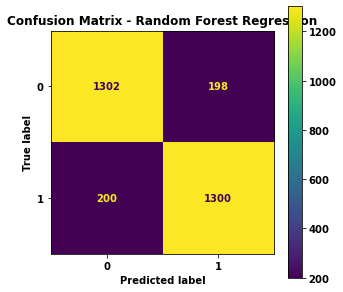


Classification Report
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      2353
           1       0.47      0.08      0.14       587

    accuracy                           0.80      2940
   macro avg       0.64      0.53      0.51      2940
weighted avg       0.74      0.80      0.74      2940



In [93]:
ConfusionMatrixDisplay(confusion_matrix=
                  confusion_matrix(y_true=y_test_bal, y_pred=y_pred_bal), 
                  display_labels=mod_rfc_best.classes_).plot()
plt.title('Confusion Matrix - Random Forest Regression')
plt.show()
print('\nClassification Report')
print(classification_report(y_true=y_test, y_pred=y_pred))

In [94]:
from sklearn.metrics import cohen_kappa_score

In [95]:
cohen_kappa_score(y_test_bal, y_pred_bal)

0.7346666666666667

In [96]:
cohen_kappa_score(y_test, y_pred)

0.08425382534275772

In [97]:
from sklearn.metrics import roc_curve, roc_auc_score

Text(0.1, 0.9, "('ROC AUC Score:', 0.8673)")

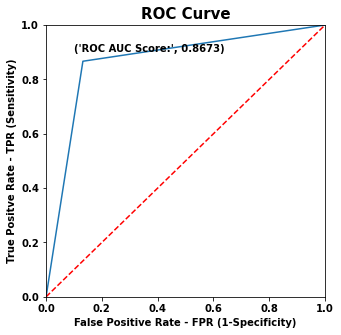

In [98]:
fpr, tpr, thresholds = roc_curve(y_test_bal, y_pred_bal)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1], 'r--')

plt.title('ROC Curve', fontsize=15)
plt.xlabel('False Positive Rate - FPR (1-Specificity)')
plt.ylabel('True Positve Rate - TPR (Sensitivity)')
plt.text(x=0.1, y=0.9, s=('ROC AUC Score:', round(roc_auc_score(y_test_bal, y_pred_bal), 4)))

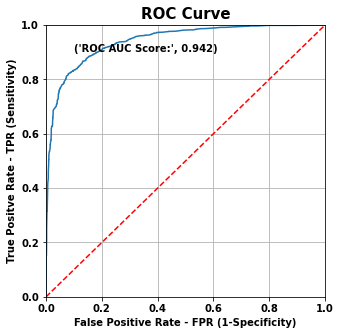

In [99]:
y_pred_bal_cls1_prob = mod_rfc_best.predict_proba(X_test_bal)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_bal, y_pred_bal_cls1_prob)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0,1], [0,1], 'r--')


plt.title('ROC Curve', fontsize=15)
plt.xlabel('False Positive Rate - FPR (1-Specificity)')
plt.ylabel('True Positve Rate - TPR (Sensitivity)')
plt.text(x=0.1, y=0.9, s=('ROC AUC Score:', round(roc_auc_score(y_test_bal, y_pred_bal_cls1_prob),4)))
plt.grid(True)
plt.show()